# Histograms, Binnings, and Density

A simple histogram can be a great first step in understanding a dataset.
Earlier, we saw a preview of Matplotlib's histogram function (discussed in [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb)), which creates a basic histogram in one line, once the normal boilerplate imports are done (see the following figure):

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

rng = np.random.default_rng(1701)
data = rng.normal(size=1000)

(array([  6.,  17.,  71., 170., 245., 246., 157.,  67.,  17.,   4.]),
 array([-3.26668015, -2.60694432, -1.94720849, -1.28747266, -0.62773683,
         0.031999  ,  0.69173484,  1.35147067,  2.0112065 ,  2.67094233,
         3.33067816]),
 <BarContainer object of 10 artists>)

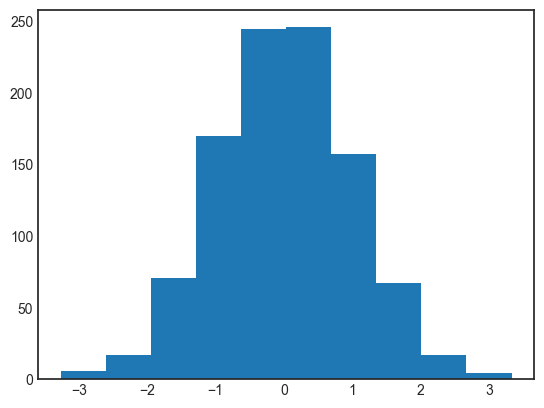

In [27]:
plt.hist(data)

The `hist` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram, shown in the following figure:

(array([0.00909455, 0.00909455, 0.00909455, 0.01364182, 0.00454727,
        0.05911457, 0.06820912, 0.11368187, 0.14096551, 0.20917463,
        0.27738375, 0.2864783 , 0.3228565 , 0.39106562, 0.40016017,
        0.38651834, 0.3228565 , 0.40925472, 0.2864783 , 0.24100555,
        0.18643826, 0.10913459, 0.13187096, 0.06366184, 0.03183092,
        0.0181891 , 0.02728365, 0.00909455, 0.00454727, 0.00454727]),
 array([-3.26668015, -3.04676821, -2.82685626, -2.60694432, -2.38703238,
        -2.16712043, -1.94720849, -1.72729655, -1.5073846 , -1.28747266,
        -1.06756071, -0.84764877, -0.62773683, -0.40782488, -0.18791294,
         0.031999  ,  0.25191095,  0.47182289,  0.69173484,  0.91164678,
         1.13155872,  1.35147067,  1.57138261,  1.79129455,  2.0112065 ,
         2.23111844,  2.45103039,  2.67094233,  2.89085427,  3.11076622,
         3.33067816]),
 [<matplotlib.patches.Polygon at 0x20d7f3e4070>])

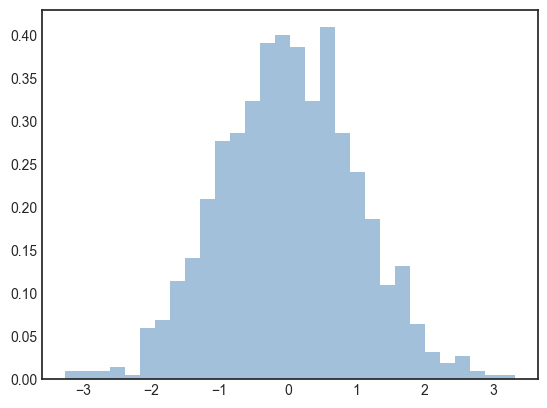

In [28]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')

The `plt.hist` docstring has more information on other available customization options.
I find this combination of `histtype='stepfilled'` along with some transparency `alpha` to be helpful when comparing histograms of several distributions (see the following figure):

{'histtype': 'stepfilled', 'alpha': 0.3, 'density': True, 'bins': 40}


(array([0.00316548, 0.00316548, 0.00633095, 0.00316548, 0.01266191,
        0.01266191, 0.01266191, 0.00949643, 0.02532381, 0.02215834,
        0.03798572, 0.06014405, 0.06647501, 0.08230239, 0.10129525,
        0.14244644, 0.15194287, 0.17093573, 0.19942502, 0.20892145,
        0.2152524 , 0.2152524 , 0.17726668, 0.21841788, 0.16460478,
        0.16777025, 0.12661906, 0.13611549, 0.09496429, 0.11079168,
        0.0538131 , 0.0538131 , 0.02532381, 0.00949643, 0.00949643,
        0.02532381, 0.01582738, 0.        , 0.00633095, 0.00633095]),
 array([-3.75739401, -3.4414858 , -3.12557759, -2.80966938, -2.49376118,
        -2.17785297, -1.86194476, -1.54603655, -1.23012835, -0.91422014,
        -0.59831193, -0.28240372,  0.03350448,  0.34941269,  0.6653209 ,
         0.98122911,  1.29713731,  1.61304552,  1.92895373,  2.24486194,
         2.56077015,  2.87667835,  3.19258656,  3.50849477,  3.82440298,
         4.14031118,  4.45621939,  4.7721276 ,  5.08803581,  5.40394401,
         5.71985

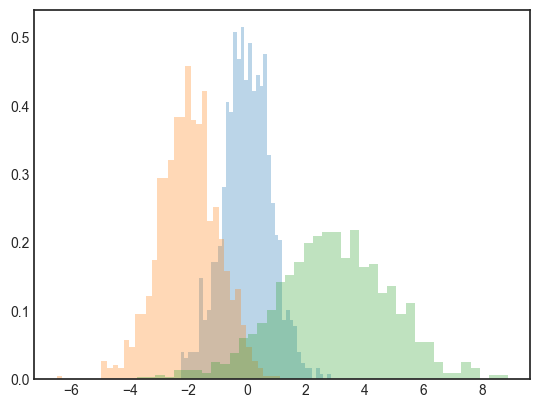

In [ ]:
x1 = rng.normal(0, 0.8, 1000)
x2 = rng.normal(-2, 1, 1000)
x3 = rng.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)
# print(kwargs)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

If you are interested in computing, but not displaying, the histogram (that is, counting the number of points in a given bin), you can use the `np.histogram` function:

In [31]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 23 241 491 224  21]


## Two-Dimensional Histograms and Binnings

Just as we create histograms in one dimension by dividing the number line into bins, we can also create histograms in two dimensions by dividing points among two-dimensional bins.
We'll take a brief look at several ways to do this here.
We'll start by defining some data—an `x` and `y` array drawn from a multivariate Gaussian distribution:

In [ ]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = rng.multivariate_normal(mean, cov, 10000).T # (10000, 2) -> (2, 10000)에서 [0]을 x, [1]을 y

### plt.hist2d: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's `plt.hist2d` function (see the following figure):

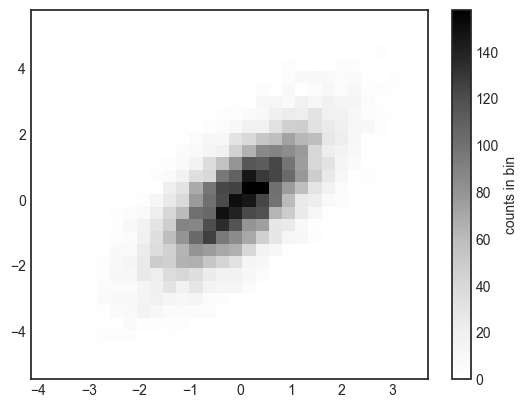

In [33]:
plt.hist2d(x, y, bins=30)
cb = plt.colorbar()
cb.set_label('counts in bin')

Just like `plt.hist`, `plt.hist2d` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring.
Further, just as `plt.hist` has a counterpart in `np.histogram`, `plt.hist2d` has a counterpart in `np.histogram2d`:

In [19]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
print(counts.shape)

(30, 30)


For the generalization of this histogram binning when there are more than two dimensions, see the `np.histogramdd` function.

### plt.hexbin: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the `plt.hexbin` routine, which represents a two-dimensional dataset binned within a grid of hexagons (see the following figure):

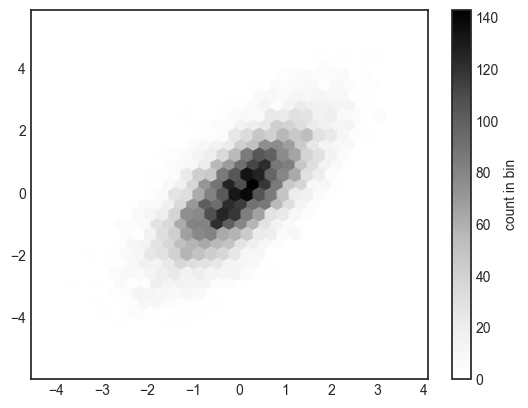

In [20]:
plt.hexbin(x, y, gridsize=30)
cb = plt.colorbar(label='count in bin')

`plt.hexbin` has a number of additional options, including the ability to specify weights for each point and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.).

### Kernel density estimation

Another common method for estimating and representing densities in multiple dimensions is *kernel density estimation* (KDE).
This will be discussed more fully in [In-Depth: Kernel Density Estimation](05.13-Kernel-Density-Estimation.ipynb), but for now I'll simply mention that KDE can be thought of as a way to "smear out" the points in space and add up the result to obtain a smooth function.
One extremely quick and simple KDE implementation exists in the `scipy.stats` package.
Here is a quick example of using KDE (see the following figure):

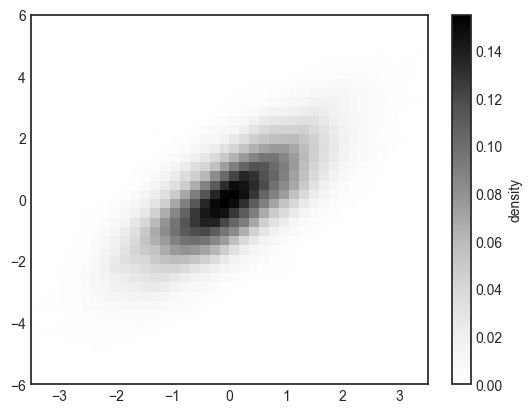

In [38]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()])) #ravel 옆으로 쭉 연결 / 실을 풀다

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6])
cb = plt.colorbar()
cb.set_label("density")

KDE has a smoothing length that effectively slides the knob between detail and smoothness (one example of the ubiquitous bias–variance trade-off).
The literature on choosing an appropriate smoothing length is vast; `gaussian_kde` uses a rule of thumb to attempt to find a nearly optimal smoothing length for the input data.

Other KDE implementations are available within the SciPy ecosystem, each with its own strengths and weaknesses; see, for example, `sklearn.neighbors.KernelDensity` and `statsmodels.nonparametric.KDEMultivariate`.
For visualizations based on KDE, using Matplotlib tends to be overly verbose.
The Seaborn library, discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb), provides a much more compact API for creating KDE-based visualizations.